# Description
This notebook creates the plot comparing the (log-pdf) of Normal vs. StudentT-distributions.

In [1]:
import numpy
import pandas
import scipy.stats
from matplotlib import pyplot

import plotting

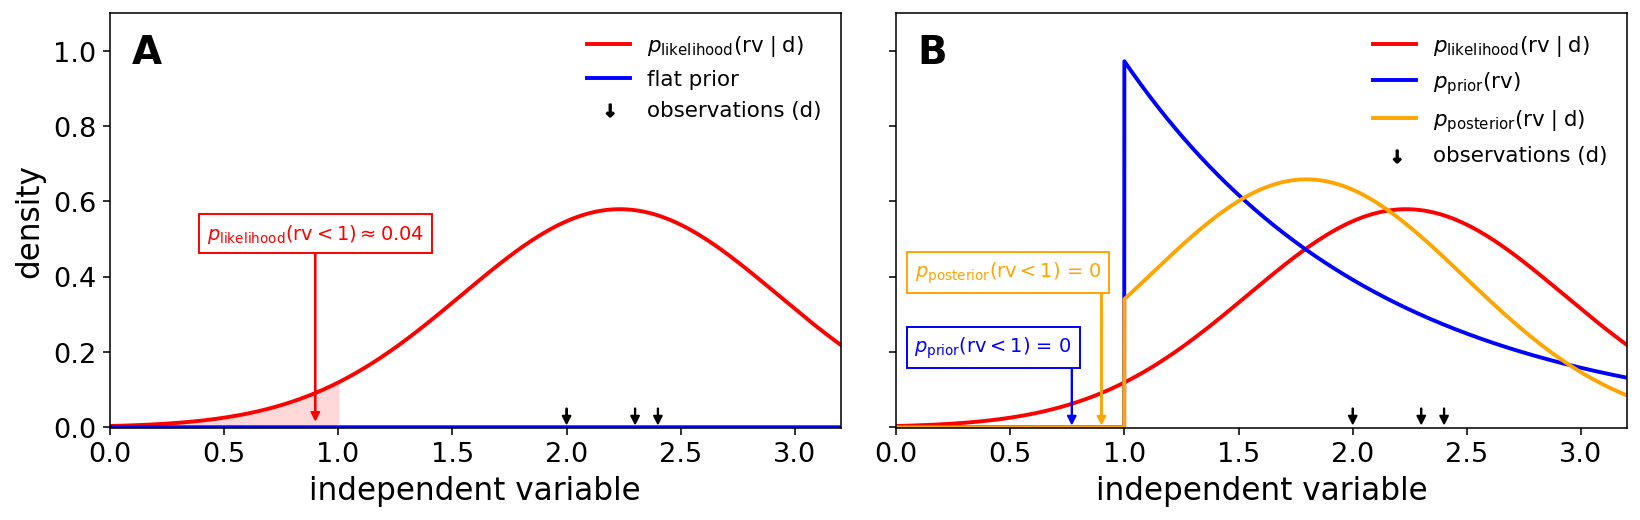

In [2]:
def draw_obs(ax, obs):
    for x in obs:
        ax.annotate(
            "",
            xy=(x, 0.01),
            xytext=(x, 0.05),
            xycoords="data",
            arrowprops=dict(
                facecolor="black",
                edgecolor="black",
                width=0.2,
                headwidth=4,
                headlength=4,
            ),
        )
    ax.scatter([], [], c="black", marker=r"$\downarrow$", s=40, label="observations (d)")
    return

def pdf(y, x):
    integral = scipy.integrate.trapz(y, x)
    pdf = y/integral
    return pdf

x = numpy.linspace(0, 4, num=5_000)
obs = numpy.array([2.0, 2.3, 2.4])
prior_flat = numpy.zeros_like(x)
prior_expo = pdf(scipy.stats.expon.pdf(x, loc=1, scale=1.1), x)
sigma = 1.2
likelihood = pdf(numpy.exp(scipy.stats.norm.logpdf(obs[None, :], loc=x[:, None], scale=sigma).sum(axis=-1)), x)
L_density_below_one = likelihood[x<1]
p_lt_1 = L_density_below_one.sum() / likelihood.sum()
posterior = pdf(prior_expo * likelihood, x)

fig, axs = pyplot.subplots(dpi=140, ncols=2, figsize=(12, 4), sharey=True, sharex=True)

# A: Likelihood
ax = axs[0]
draw_obs(ax, obs)
ax.plot(x, likelihood, lw=2, color="red", label="$p_\mathrm{likelihood}(\mathrm{rv \mid d})$")
ax.fill_between(x[x<1], L_density_below_one, color="#FFD9D9")
ax.plot(x, prior_flat, lw=2, color="blue", label="flat prior")
ax.legend()
ax.annotate(
    r"$p_\mathrm{likelihood}(\mathrm{rv}<1) \approx $" + f"{p_lt_1:.2f}",
    xy=(0.9, 0.02),
    xytext=(0.9, 0.5),
    fontsize=10,
    color="red",
    ha="center",
    bbox=dict(facecolor="white", edgecolor="red"),
    arrowprops=dict(
        facecolor="red",
        edgecolor="red",
        width=0.2,
        headwidth=4,
        headlength=4,
    ),
)
ax.set(
    xlabel="independent variable",
    ylabel="density"
)

# B: Posterior
ax = axs[1]
draw_obs(ax, obs)
ax.plot(x, likelihood, lw=2, color="red", label="$p_\mathrm{likelihood}(\mathrm{rv \mid d})$")
ax.plot(x, prior_expo, lw=2, color="blue", label="$p_\mathrm{prior}(\mathrm{rv})$")
ax.plot(x, posterior, lw=2, color="orange", label="$p_\mathrm{posterior}(\mathrm{rv \mid d})$")
ax.legend(loc="upper right")
ax.annotate(
    "$p_\mathrm{posterior}(\mathrm{rv}<1)$ = 0",
    xy=(0.9, 0.01),
    xytext=(0.9, 0.4),
    ha="right",
    fontsize=10,
    color="orange",
    bbox=dict(facecolor="white", edgecolor="orange"),
    arrowprops=dict(
        facecolor="orange",
        edgecolor="orange",
        width=0.2,
        headwidth=4,
        headlength=4,
    ),
)
ax.annotate(
    "$p_\mathrm{prior}(\mathrm{rv}<1)$ = 0",
    xy=(0.77, 0.01),
    xytext=(0.77, 0.2),
    ha="right",
    fontsize=10,
    color="blue",
    bbox=dict(facecolor="white", edgecolor="blue"),
    arrowprops=dict(
        facecolor="blue",
        edgecolor="blue",
        width=0.2,
        headwidth=4,
        headlength=4,
    ),
)
ax.set(
    ylim=(-0.001, 1.1),
    xlim=(x[0], 3.2),
    xlabel="independent variable",
)

axs[0].text(0.03, 0.88, "A", transform=axs[0].transAxes, size=20, weight="bold")
axs[1].text(0.03, 0.88, "B", transform=axs[1].transAxes, size=20, weight="bold")

fig.tight_layout()
plotting.savefig(fig, "2.1 Bayes' rule")
pyplot.show()

In [3]:
%load_ext watermark
%watermark

Last updated: 2021-12-15T10:13:23.323176+01:00

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.24.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

